In [14]:
!clear
from qiskit import *
from qiskit.visualization import plot_histogram

In [15]:
%matplotlib inline

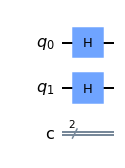

In [16]:
# importing set of data of |00> ,|01>, |10>, |11>

qc = QuantumCircuit(2,2)
qc.h([0,1])
qc.draw(output = 'mpl')

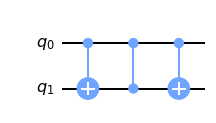

In [17]:
# Creating an oracle for search parameter
# Here our search parameter is will |w> state that we want to find. 

oracle = QuantumCircuit(2, name = 'oracle')
oracle.cx(0,1)
oracle.cz(0,1)
oracle.cx(0,1)

oracle.to_gate()

oracle.draw(output = 'mpl')

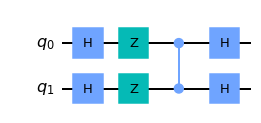

In [18]:
# Now we have isolated with oracle of what we want to search, now amplituding the search to show its presence

# To do so we will use diffuser opreator for the same.

#The diffuser opreator will read as follows

diffuser = QuantumCircuit(2, name = 'diffuser')

diffuser.h([0,1])
diffuser.z([0,1])
diffuser.cz(0,1)
diffuser.h([0,1])
diffuser.to_gate()
diffuser.draw(output ='mpl')

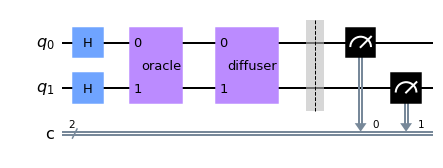

In [19]:
# Now we have all the pieces in place lets combine them to search our parameter in give domain

#Since we have already created an domain, now we have to apply our oracle+diffuser

qc.append(oracle,[0,1])
qc.append(diffuser,[0,1])

qc.barrier()

qc.measure([0,1], [0,1])

qc.draw(output= 'mpl')

{'01': 1}


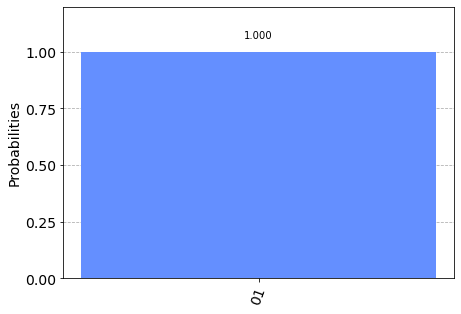

In [21]:
backend = Aer.get_backend('qasm_simulator')

result = execute(qc,backend,shots =1).result()

counts = result.get_counts()
print(counts)
plot_histogram(counts)